In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [8]:
data = pd.read_pickle('freeze/backtest/candles_20210323_12_41_NQH1.pickle')

In [9]:
data.head(200).tail(50)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,ema_filter,ema_filtered_signal,vol_filter,filtered_signal
date,,,,,,,,,,,,,,,,
2020-08-25 21:16:00,True,11689.25,11708.00,11687.50,11707.00,11699.142527,11707.00,12097,11689.981990,11605.883473,27.251982,1,1.0,1,True,1
2020-08-25 21:34:00,True,11707.25,11714.75,11700.75,11708.75,11709.205731,11708.75,12275,11696.237993,11607.730370,26.731106,1,1.0,1,True,1
2020-08-25 21:51:00,True,11708.75,11719.00,11703.50,11709.75,11711.834501,11709.75,12194,11700.741995,11609.559454,26.289701,1,1.0,1,True,1
2020-08-25 22:02:00,True,11709.50,11720.00,11707.50,11716.25,11714.671621,11716.25,12142,11705.911330,11611.469609,25.747785,1,1.0,1,True,1
2020-08-26 01:52:00,True,11716.25,11754.00,11712.75,11748.50,11730.100364,11748.50,12029,11720.107554,11613.919590,26.356950,1,1.0,1,True,1
2020-08-26 05:04:00,True,11748.25,11758.00,11729.50,11738.00,11743.653113,11738.00,12000,11726.071702,11616.135046,26.441155,0,1.0,0,True,0
2020-08-26 09:13:00,True,11738.00,11750.00,11726.75,11737.75,11737.790599,11737.75,12049,11729.964468,11618.303605,26.315777,0,1.0,0,True,0
2020-08-26 10:57:30,True,11738.25,11766.50,11732.75,11760.00,11748.681024,11760.00,12039,11739.976312,11620.826957,26.607840,1,1.0,1,True,1
2020-08-26 13:48:30,True,11760.25,11784.00,11752.00,11770.50,11767.592038,11770.50,12032,11750.150875,11623.488953,26.819664,1,1.0,1,True,1


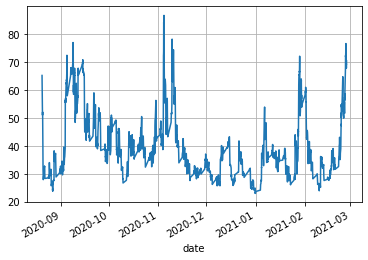

In [10]:
data['atr'].plot(grid=True);

<AxesSubplot:xlabel='date'>

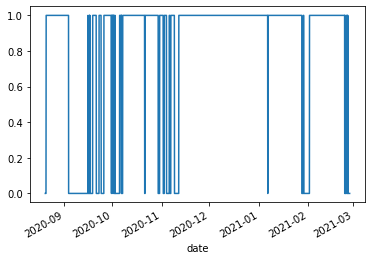

In [11]:
(data['vol_filter']*1).plot()

In [4]:
d = data.reset_index()

In [5]:
d['secs'] = d.date.diff()[1:].apply(lambda x: x.seconds)
d

,date,open,high,low,close,volume,average,barCount,secs
0,2018-12-24 00:00:00,6049.75,6049.75,6020.00,6021.00,961,6034.825,654,NaN
1,2018-12-24 00:01:00,6021.25,6034.75,6021.25,6030.75,491,6028.250,368,60.0
2,2018-12-24 00:02:00,6032.50,6043.00,6032.50,6040.50,510,6038.225,299,60.0
3,2018-12-24 00:03:00,6041.00,6043.00,6036.00,6040.25,283,6039.825,194,60.0
4,2018-12-24 00:04:00,6039.25,6043.25,6039.25,6042.25,185,6041.325,126,60.0
...,...,...,...,...,...,...,...,...,...
35051,2019-01-30 22:55:00,6843.25,6845.25,6842.25,6845.00,162,6843.750,82,60.0
35052,2019-01-30 22:56:00,6844.75,6845.25,6843.75,6844.00,115,6844.400,76,60.0
35053,2019-01-30 22:57:00,6843.50,6843.75,6841.00,6841.75,202,6842.625,88,60.0
35054,2019-01-30 22:58:00,6841.50,6842.00,6840.50,6840.75,77,6841.000,55,60.0


In [6]:
d.loc[1150:].head(10)

,date,open,high,low,close,volume,average,barCount,secs
1150,2018-12-24 19:10:00,5906.25,5908.25,5902.00,5906.50,539,5904.700,337,60.0
1151,2018-12-24 19:11:00,5906.25,5910.25,5902.25,5902.75,675,5907.900,375,60.0
1152,2018-12-24 19:12:00,5902.75,5903.75,5895.75,5901.25,385,5899.850,268,60.0
1153,2018-12-24 19:13:00,5900.25,5901.25,5888.75,5893.50,688,5892.450,444,60.0
1154,2018-12-24 19:14:00,5893.25,5898.50,5889.00,5894.00,1001,5893.725,447,60.0
1155,2018-12-26 00:00:00,5902.00,5916.25,5901.50,5915.00,625,5909.250,381,17160.0
1156,2018-12-26 00:01:00,5915.75,5915.75,5906.50,5911.50,191,5910.275,136,60.0
1157,2018-12-26 00:02:00,5911.50,5912.25,5908.75,5911.00,146,5910.525,99,60.0
1158,2018-12-26 00:03:00,5911.25,5912.25,5909.00,5910.50,76,5910.675,60,60.0
1159,2018-12-26 00:04:00,5910.75,5914.00,5909.75,5912.25,112,5911.575,69,60.0


In [7]:
d[(d.secs != 60) & (d.secs != 960) & (d.secs != 3660)]

,date,open,high,low,close,volume,average,barCount,secs
0,2018-12-24,6049.75,6049.75,6020.0,6021.00,961,6034.825,654,NaN
1155,2018-12-26,5902.00,5916.25,5901.5,5915.00,625,5909.250,381,17160.0
6616,2019-01-02,6349.50,6355.75,6344.0,6353.00,332,6348.950,188,0.0
25501,2019-01-22,6755.50,6765.75,6752.5,6758.25,496,6758.150,287,18060.0


In [8]:
z = d[d.secs == 0]
len(z)

1

In [9]:
z.values

array([[Timestamp('2019-01-02 00:00:00'), 6349.5, 6355.75, 6344.0,
        6353.0, 332, 6348.95, 188, 0.0]], dtype=object)

In [10]:
data.loc['2019-01-03 22:55:00':].head(10)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-03 22:55:00,6172.75,6172.75,6170.50,6170.75,20,6171.375,15
2019-01-03 22:56:00,6170.75,6171.00,6168.50,6171.00,62,6169.950,35
2019-01-03 22:57:00,6171.00,6172.00,6170.75,6171.00,24,6171.225,17
2019-01-03 22:58:00,6171.00,6172.00,6170.75,6171.00,20,6171.175,17
2019-01-03 22:59:00,6170.75,6172.25,6170.50,6172.25,39,6171.300,32
2019-01-04 00:00:00,6168.75,6174.25,6163.50,6174.00,191,6169.275,155
2019-01-04 00:01:00,6174.00,6176.75,6173.50,6174.25,134,6175.075,107
2019-01-04 00:02:00,6174.00,6174.00,6170.25,6171.50,88,6171.650,69
2019-01-04 00:03:00,6172.00,6174.75,6172.00,6174.25,62,6173.625,43


In [11]:
data.loc['2019-01-02 22:58:00':].head(10)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-02 22:58:00,6266.25,6272.50,6266.00,6266.25,288,6268.075,137
2019-01-02 22:59:00,6266.25,6268.25,6261.25,6261.25,181,6264.975,122
2019-01-03 00:00:00,6242.75,6244.00,6227.50,6232.50,855,6236.875,559
2019-01-03 00:01:00,6232.50,6240.75,6232.25,6236.00,431,6236.525,297
2019-01-03 00:02:00,6234.50,6236.00,6223.25,6224.50,508,6228.000,338
2019-01-03 00:03:00,6224.50,6231.00,6223.75,6226.75,363,6227.450,242
2019-01-03 00:04:00,6225.75,6226.75,6216.25,6222.00,306,6222.650,234
2019-01-03 00:05:00,6221.50,6222.00,6212.75,6220.75,424,6217.475,277
2019-01-03 00:06:00,6220.50,6227.75,6220.25,6224.25,247,6224.225,156


In [12]:
data.iloc[700:].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-12-24 11:40:00,6101.25,6101.75,6099.50,6100.00,47,6100.750,32
2018-12-24 11:41:00,6100.00,6101.50,6099.00,6101.25,52,6100.250,40
2018-12-24 11:42:00,6100.75,6101.25,6099.75,6100.25,39,6100.375,32
2018-12-24 11:43:00,6100.50,6102.50,6100.50,6101.75,42,6101.425,26
2018-12-24 11:44:00,6101.50,6102.75,6101.25,6102.00,24,6102.000,21
2018-12-24 11:45:00,6102.00,6102.00,6100.25,6100.75,21,6100.875,18
2018-12-24 11:46:00,6100.75,6103.50,6100.50,6103.25,27,6101.900,25
2018-12-24 11:47:00,6102.75,6103.75,6101.00,6103.50,42,6102.025,29
2018-12-24 11:48:00,6103.75,6105.00,6103.75,6104.75,72,6104.550,46


In [13]:
df=data.loc['2020-05-26 12:01':].head(50)
df

,open,high,low,close,volume,average,barCount
date,,,,,,,


In [14]:
df.open[0], df.high.max(), df.low.min(), df.close[-1], df.volume.sum()

IndexError: index out of bounds

In [ ]:
data

In [ ]:
data.loc['2020-05-21 10:44:30':].head(50)

In [ ]:
data[data.index.duplicated()]

In [ ]:
df=data.loc['2020-05-26 11:46:30':'2020-05-26 12:32:30']
df

In [ ]:
df.open[0], df.high.max(), df.low.min(), df.close[-1], df.volume.sum()